# 1. Загрузка и подготовка данных

In [60]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats as st
from numpy.random import RandomState

In [61]:

geo_data_0= pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1= pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2= pd.read_csv('/datasets/geo_data_2.csv')
display(geo_data_0)
display(geo_data_1)
display(geo_data_2)


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [62]:

geo_data_0 = geo_data_0.drop_duplicates().reset_index(drop=True)
geo_data_1 = geo_data_1.drop_duplicates().reset_index(drop=True)
geo_data_2 = geo_data_2.drop_duplicates().reset_index(drop=True)

In [63]:
display(geo_data_0.info())
display(geo_data_1.info())
display(geo_data_2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

#### Вызовем матрицы корреляции и проанализируем результаты

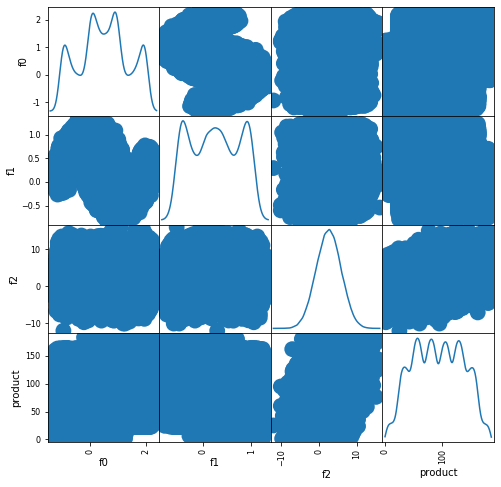

In [64]:
scatter_matrix(geo_data_0, alpha=1, figsize=(8, 8),diagonal='kde', s=1000) #diagonal='kde
pyplot.show()

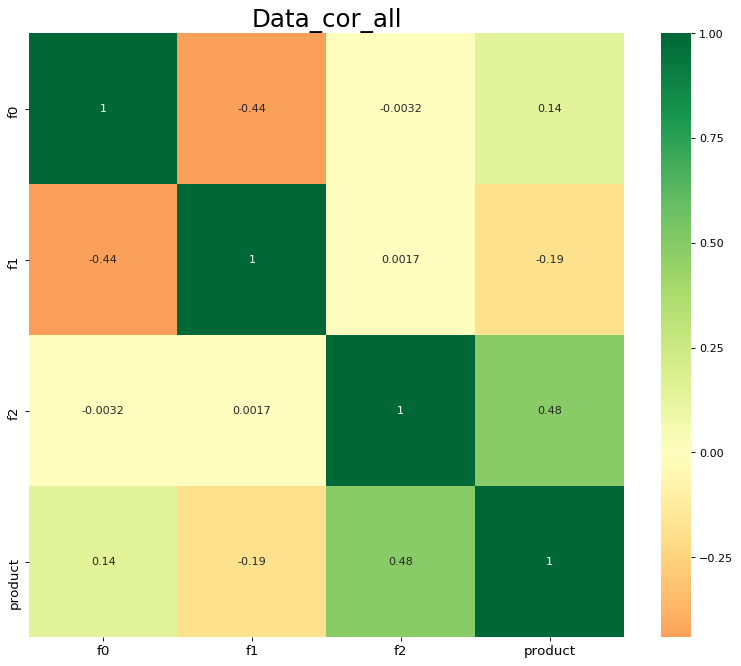

In [65]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(geo_data_0.corr(), xticklabels= geo_data_0.corr().columns,yticklabels=geo_data_0.corr().columns,
            cmap='RdYlGn', center=0, annot=True)


plt.title('Data_cor_all', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [66]:
geo_data_0_clean = geo_data_0[['f0','f1','f2','product']]
target_0 = geo_data_0_clean['product']
features_0 = geo_data_0_clean.drop('product', axis=1)

features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(features_0, target_0, 
                                                                              test_size=0.25, random_state=12345)





display(features_valid_0.shape)
display(target_train_0)


(25000, 3)

27212    147.370612
7866     147.630053
62041     77.696728
70185     55.210501
82230    113.891723
            ...    
4094     124.380793
85412    144.874913
2177     134.967255
77285     64.494357
86498    151.514894
Name: product, Length: 75000, dtype: float64

In [67]:
geo_data_1_clean = geo_data_1[['f0','f1','f2','product']]
target_1 = geo_data_1_clean['product']
features_1 = geo_data_1_clean.drop('product', axis=1)

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(features_1, target_1, 
                                                                              test_size=0.25, random_state=12345)
display(features_valid_1.shape)
display(target_train_1.shape)

(25000, 3)

(75000,)

In [68]:
geo_data_2_clean = geo_data_2[['f0','f1','f2','product']]
target_2 = geo_data_2_clean['product']
features_2 = geo_data_2_clean.drop('product', axis=1)

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(features_2, target_2, 
                                                                              test_size=0.25, random_state=12345)
display(features_valid_2.shape)
display(target_train_2.shape)

(25000, 3)

(75000,)

#### Данные подготовили и приступаем к следующему шагу

# 2. Обучение и проверка модели

In [69]:

model_0 = LinearRegression()
model_0.fit(features_train_0,target_train_0) 
predicted_valid_0 = model_0.predict(features_valid_0)
result_0 = mean_squared_error(target_valid_0, predicted_valid_0)**0.5
display(result_0)
display('Среднее количество сырья по региону:',geo_data_0_clean['product'].mean())
display(geo_data_0_clean.describe())

37.5794217150813

'Среднее количество сырья по региону:'

92.50000000000001

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [70]:

model_1 = LinearRegression()
model_1.fit(features_train_1,target_train_1) 
predicted_valid_1 = model_1.predict(features_valid_1)
result_1 = mean_squared_error(target_valid_1, predicted_valid_1)**0.5
display(result_1)
display('Среднее количество сырья по региону:',geo_data_1_clean['product'].mean())
display(geo_data_1_clean.describe())
display(geo_data_1_clean.query('product> 60 and f0>4 and f1>-4 and f2>2'))

0.893099286775616

'Среднее количество сырья по региону:'

68.82500000000002

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
8,13.355129,-0.332068,4.998647,134.766305
22,9.391662,2.386681,5.002290,134.766305
23,10.852199,-3.412277,4.996318,134.766305
28,10.373859,1.145210,4.000138,107.813044
40,8.706025,-1.677798,5.002392,134.766305
...,...,...,...,...
99959,16.482687,4.734000,3.998140,107.813044
99970,4.265967,-1.900432,2.993666,80.859783
99974,7.461301,-0.670218,3.000756,80.859783
99978,5.021228,-3.691878,4.991054,134.766305


In [71]:

model_2 = LinearRegression()
model_2.fit(features_train_2,target_train_2) 
predicted_valid_2 = model_2.predict(features_valid_2)
result_2 = mean_squared_error(target_valid_2, predicted_valid_2)**0.5
display(result_2)
display('Среднее количество сырья по региону:',geo_data_2_clean['product'].mean())
display(geo_data_2_clean.describe())

40.02970873393434

'Среднее количество сырья по региону:'

95.00000000000004

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


На основе  RMSE можно сделать вывод, что регион в датасете geo_data_1_clean самый преспективный, но запасы 'product' в нем самые низкии.

# 3. Подготовка к расчёту прибыли

In [72]:
BUDGET = 10000000000
PROFIT= 450000
QUANTITY_WELLS =100000
AVERAGE_STOCK = BUDGET/PROFIT/200

In [73]:
display('Среднее количество сырья на скважину:',AVERAGE_STOCK )
display('Регион 0 средний запас сырья:',geo_data_0_clean['product'].mean())
display('Регион 1 средний запас сырья:',geo_data_1_clean['product'].mean())
display('Регион 2 средний запас сырья:',geo_data_2_clean['product'].mean())

'Среднее количество сырья на скважину:'

111.11111111111111

'Регион 0 средний запас сырья:'

92.50000000000001

'Регион 1 средний запас сырья:'

68.82500000000002

'Регион 2 средний запас сырья:'

95.00000000000004

In [74]:
display(geo_data_0_clean.describe())
display(geo_data_1_clean.describe())
display(geo_data_2_clean.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


#### Из данных видно, что запасы сырья в регионе 1 меньше, чем в других регионах,и хотя регион 2 выглядит гораздо перспективнее как по запасам так и по возможной прибыли,  исходя из шага 2 разрабатывать лучше все-таки регион 1. Посмотрим в следующем шаге доп. информацию по регионам.

# 4. Расчёт прибыли и рисков 

In [111]:
def revenue (target_0, predicted_valid_0, count):
    probs_sorted = predicted_valid_0.sort_values(ascending=False)
    selected = target_0[probs_sorted.index][:count]
    return 450000 * selected.sum() - BUDGET

state = np.random.RandomState(12345)
 
values_0 = []
predictions_0 = pd.Series(predicted_valid_0)
valid_target_0 = pd.Series(target_valid_0).reset_index(drop=True)

for i in range(1000):
    
    target_subsample = valid_target_0.sample(n=500, replace = True, random_state=state)
    probs_subsample = predictions_0[target_subsample.index]
    values_0.append(revenue(target_subsample,probs_subsample,200))

values_0 = pd.Series(values)
lower = values.quantile(0.025)
upper = values.quantile(0.975)

mean = values_0.mean()
display('Средняя выручка:', int(mean))
display('95%-квантиль:',lower,upper)
negative_meaning = [x for x in values_0 if x < 0]
negative_meaning = pd.Series(negative_meaning)
#print(negative meaning.count()/1000)

display('Степень риска для Региона 0:',negative_meaning.count()/1000) 

'Средняя выручка:'

425938526

'95%-квантиль:'

-102090094.83793654

947976353.358369

'Степень риска для Региона 0:'

0.06

In [116]:
def revenue (target_1, predicted_valid_1, count):
    probs_sorted = predicted_valid_1.sort_values(ascending=False)
    selected = target_1[probs_sorted.index][:count]
    return 450000 * selected.sum() - BUDGET

state = np.random.RandomState(12345)
 
values_1 = []
predictions_1 = pd.Series(predicted_valid_1)
valid_target_1 = pd.Series(target_valid_1).reset_index(drop=True)
 
for i in range(1000):
    
    target_subsample = valid_target_1.sample(n=500, replace = True, random_state=state)
    probs_subsample = predictions_1[target_subsample.index]
    values_1.append(revenue(target_subsample,probs_subsample,200))

values_1 = pd.Series(values_1)
lower = values.quantile(0.025)
upper = values.quantile(0.975)

mean = values_1.mean()
display('Средняя выручка:', mean)
display('95%-квантиль:', lower,upper)
negative_meaning_1 = [x for x in values_1 if x < 0]
negative_meaning_1 = pd.Series(negative_meaning_1)
display('Степень риска для Региона 1:',negative_meaning_1.count()/1000)

'Средняя выручка:'

515222773.44328994

'95%-квантиль:'

-102090094.83793654

947976353.358369

'Степень риска для Региона 1:'

0.01

In [117]:
def revenue (target_2, predicted_valid_2, count):
    probs_sorted = predicted_valid_2.sort_values(ascending=False)
    selected = target_2[probs_sorted.index][:count]
    return 450000 * selected.sum() - BUDGET

state = np.random.RandomState(12345)
 
values_2 = []
predictions_2 = pd.Series(predicted_valid_2)
valid_target_2 = pd.Series(target_valid_2).reset_index(drop=True)
 
for i in range(1000):
    
    target_subsample = valid_target_2.sample(n=500, replace = True, random_state=state)
    probs_subsample = predictions_2[target_subsample.index]
    values_2.append(revenue(target_subsample,probs_subsample,200))

values_2 = pd.Series(values_2)
lower = values.quantile(0.025)
upper = values.quantile(0.975)

mean = values_2.mean()
display('Средняя выручка:', mean)
display('95%-квантиль:', lower,upper)
negative_meaning_2 = [x for x in values_2 if x < 0]
negative_meaning_2 = pd.Series(negative_meaning_2)
display('Степень риска для Региона 2:',negative_meaning_2.count()/1000) 

'Средняя выручка:'

435008362.78275555

'95%-квантиль:'

-102090094.83793654

947976353.358369

'Степень риска для Региона 2:'

0.064

In [58]:

#def revenue (target_0, predicted_valid_0, count):
#    probs_sorted = predicted_valid_0.sort_values(ascending=False)
#    selected = target_0[probs_sorted.index][:count]
#    return 450000 * selected.sum() - BUDGET

#state = np.random.RandomState(12345)
#probabilities= pd.Series(predicted_valid_0, index=target_valid_0.index)  
#values = []
#for i in range(1000):
#    target_subsample = target_0.sample(n=500, replace=True, random_state=state)
#    probs_subsample = probabilities[target_subsample.index]
#    values.append(revenue(target_subsample, probs_subsample, 200))

#values = pd.Series(values)
#lower = values.quantile(0.0275)
#upper = values.quantile(0.975)

#mean = values.mean()
#display('Средняя выручка:', mean)
#display('95%-квантиль:', lower,upper)

#display('Степень риска для Региона 0:',int(mean/BUDGET*100))

##  Вывод : 
После анализа данных мы видим, что несмотря на меньший общий запас сырья в Регионе 1 прибыль после уменьшения выборки до 500 лучших оказываеться выше чем в других Регионах.Это в купе с результаты RMSE и самыми низкими рисками делает этот Регион самым преспективным для добычи.

# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.